# Мироненко А.
# Датасет GEOD-74737
# DESeq2

Чтение данных и составление матрицы дизайна:

In [23]:
samples <- read.table('GSE74737_BreenMS_raw_and_normalized_counts - Raw Count Matrix.txt', 
                      header=TRUE,
                      skip=2,
                      sep=',')

sample_names = colnames(samples)[-1]
design = as.matrix(rep('0', length(sample_names)))


for (i in 1:10){
  design[i] <- '0c'
}


for (i in 10:20){
  design[i] <- '1ma'
}

for (i in 20:30){
  design[i] <- '2map'
}

colnames(design) <- 'disease'
rownames(design) <- sample_names

In [2]:
samples

Gene,CONTROL_1,CONTROL_2,CONTROL_3,CONTROL_4,CONTROL_5,CONTROL_6,CONTROL_7,CONTROL_8,CONTROL_9,⋯,MAP_1,MAP_2,MAP_3,MAP_4,MAP_5,MAP_6,MAP_7,MAP_8,MAP_9,MAP_10
<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1-мар.,1783,1117,2721,1466,1522,1218,781,886,910,⋯,1506,1016,1040,951,949,1495,1542,2321,1250,1509
2-мар.,1337,585,2773,526,466,1729,1529,1099,1134,⋯,1329,1489,1840,759,1404,1358,1622,800,1217,1405
3-мар.,204,126,106,69,37,85,77,88,109,⋯,106,125,141,57,65,134,103,67,69,91
4-мар.,0,0,1,1,1,1,2,0,0,⋯,0,0,1,0,0,0,2,1,0,0
5-мар.,404,279,655,373,363,266,205,231,249,⋯,351,220,254,279,268,334,329,455,309,254
6-мар.,3029,1583,3780,1926,1612,1449,1852,1947,2005,⋯,2271,2524,2698,2320,2365,2345,2852,2227,2696,1662
7-мар.,3938,3226,6846,4323,3609,2701,3059,2439,2689,⋯,4452,3448,3559,2694,3550,4532,4012,4526,3484,4083
8-мар.,15716,6557,14827,3121,2059,11586,10532,7847,12708,⋯,14716,24034,10250,4955,9912,9643,6611,7490,9304,6870
9-мар.,215,68,199,100,71,81,69,80,89,⋯,94,141,179,155,53,142,146,94,129,117


Как видно, названия первых генов считались некорректно (для других форматов ситуация аналогична), поэтому их нет смысла рассматривать.

In [100]:
samples_clean <- samples[27:nrow(samples),]

In [6]:
library(DESeq2)

Loading required package: S4Vectors
Loading required package: stats4
Loading required package: BiocGenerics
Loading required package: parallel

Attaching package: ‘BiocGenerics’

The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB

The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs

The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    union, unique, unsplit, which, which.max, which.min


Attaching package: ‘S4Vectors’

The followin

In [131]:
run_deseq <- function(samples, design) {
    dds <- DESeqDataSetFromMatrix(countData = samples[, -1],
                              colData = design,
                              design = ~disease)
    
    dds$disease <- relevel(as.factor(design), ref='0c')
    p_val <- 0.1
    
    #leave out hardly expressed genes
    keep <- rowSums(counts(dds)) >= 10
    dds <- dds[keep,]


    dds_fit <- DESeq(dds)
    plotMA(dds_fit, ylim=c(-2,2))
    res <- results(dds_fit)
    summary(res)
    res$gene = samples[keep,1]
    
    return(res[which(res$padj < p_val),, drop=FALSE])
}

estimating size factors
estimating dispersions
gene-wise dispersion estimates
mean-dispersion relationship
final dispersion estimates
fitting model and testing
-- replacing outliers and refitting for 48 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)
estimating dispersions
fitting model and testing



out of 16961 with nonzero total read count
adjusted p-value < 0.1
LFC > 0 (up)       : 8, 0.047%
LFC < 0 (down)     : 5, 0.029%
outliers [1]       : 0, 0%
low counts [2]     : 9536, 56%
(mean count < 180)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



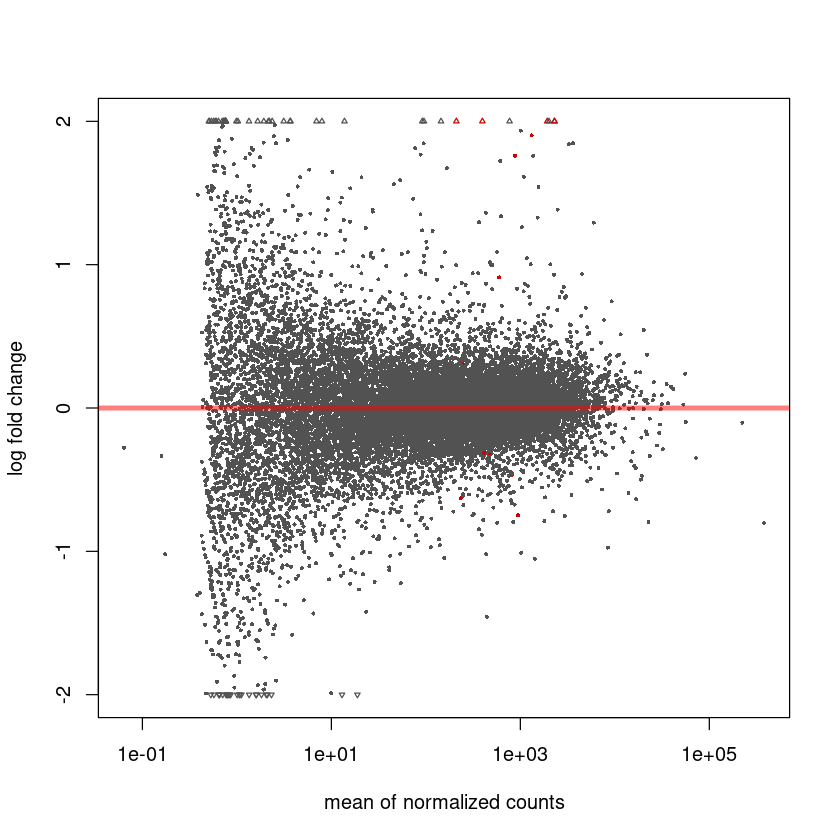

In [132]:
control_vs_ma <- run_deseq(samples_clean[, 1:20], design[which(design != "2map"), ,drop=FALSE])

In [135]:
control_vs_ma

log2 fold change (MLE): disease 1ma vs 0c 
Wald test p-value: disease 1ma vs 0c 
DataFrame with 13 rows and 7 columns
              baseMean     log2FoldChange              lfcSE              stat
             <numeric>          <numeric>          <numeric>         <numeric>
3794  245.532412569024  0.305124779965556 0.0802345604868431  3.80290959549271
5667  880.867292829163    1.7604547391004    0.4547952167266  3.87087347085864
8457   1927.6223422439    2.7562047842508  0.712191168042006  3.87003505228562
8610  595.541530758857  0.910835615295652  0.235557022838725  3.86673088460308
8815  396.753182864823   2.43097241274764  0.590858124566007  4.11430817598256
...                ...                ...                ...               ...
17798 817.823265654418 -0.464423792482587  0.123593425294284 -3.75767393270931
17870 2305.85789866491   2.98757149086646  0.731705759322548  4.08302306330418
17877 233.557631318296 -0.630998911639208  0.153603383024251 -4.10797535324848
18518 210.341

estimating size factors
estimating dispersions
gene-wise dispersion estimates
mean-dispersion relationship
final dispersion estimates
fitting model and testing
-- replacing outliers and refitting for 49 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)
estimating dispersions
fitting model and testing



out of 17378 with nonzero total read count
adjusted p-value < 0.1
LFC > 0 (up)       : 385, 2.2%
LFC < 0 (down)     : 636, 3.7%
outliers [1]       : 0, 0%
low counts [2]     : 6065, 35%
(mean count < 39)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



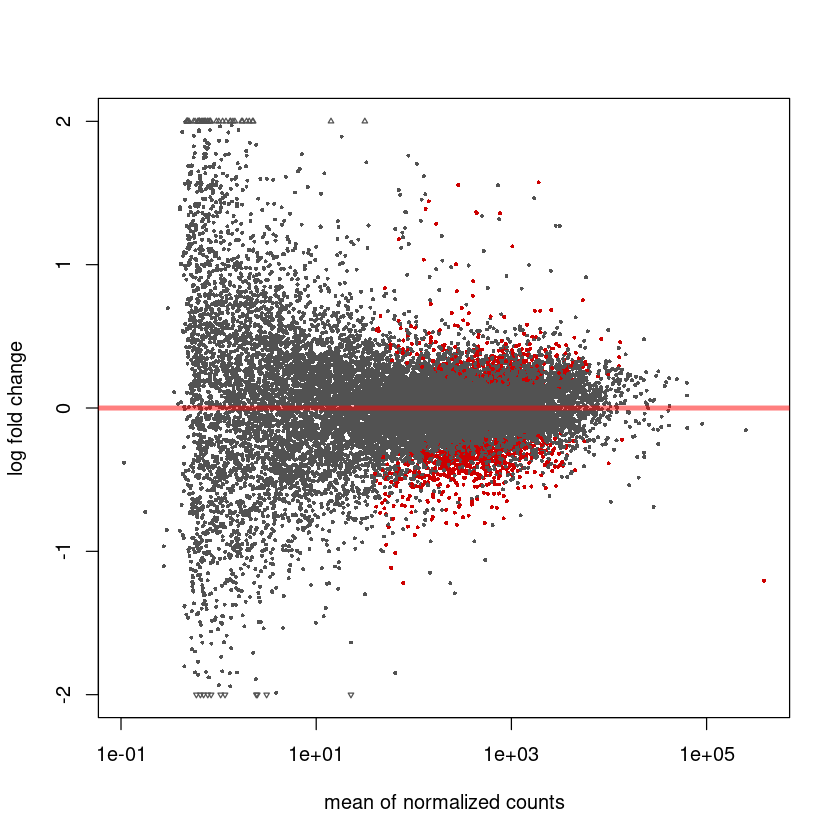

In [93]:
control_vs_map <- run_deseq(samples_clean[, -c(11:20)], design[which(design != "1ma"), ,drop=FALSE])